# Logistic Regression #
----------------------------------------------------------------------------------------------------------------------
## Introduction ##
Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Some of the examples of classification problems are Email spam or not spam, Online transactions Fraud or not Fraud, Tumor Malignant or Benign. Logistic regression transforms its output using the logistic sigmoid function to return a probability value.


## Hypothesis function ## 
The hypothesis of logistic regression tends it to limit the cost function between 0 and 1. Therefore linear functions fail to represent it as it can have a value greater than 1 or less than 0 which is not possible as per the hypothesis of logistic regression.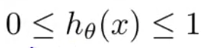


## Sigmoid Function ##
In order to map predicted values to probabilities, we use the Sigmoid function. The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.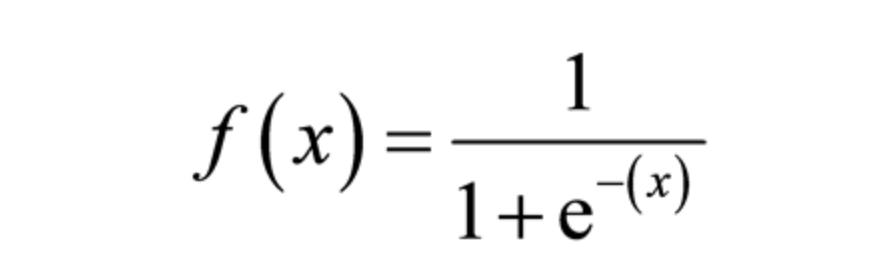

## Cost Function ##
We learnt about the cost function J(θ) in the Linear regression, the cost function represents optimization objective i.e. we create a cost function and minimize it so that we can develop an accurate model with minimum error.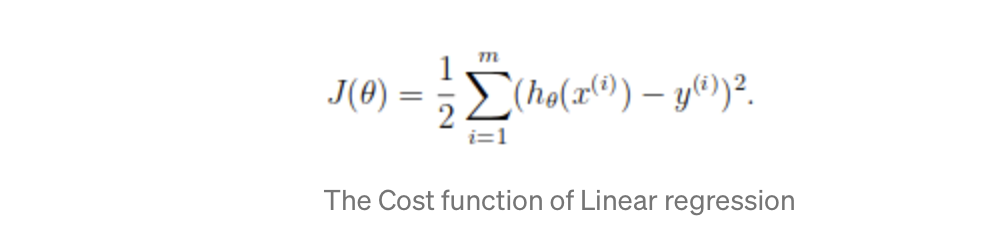

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

## Read the Data ##


In [3]:
data = pd.read_csv("Iris.csv", header = 0)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Summary about the Data ##

In [4]:
data.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


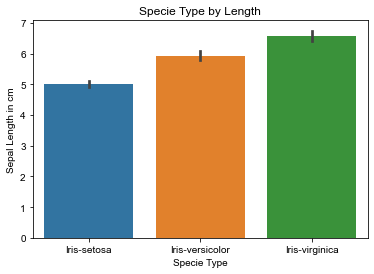

In [5]:
## Visualization of Specie Type by Length ##
sns.barplot(x="Species", y="SepalLengthCm", data=data)
sns.set(rc={'figure.figsize':(12,16)})

plt.xlabel('Specie Type')
plt.ylabel('Sepal Length in cm')
plt.title('Specie Type by Length')

plt.show()

## Split Data in training and test ##





In [6]:
X = data.iloc[:,0:4].values
Y = data.iloc[:,-1].values

#Where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica
labelencoder_Y=LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


## Pairplot DataFrame ##


/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


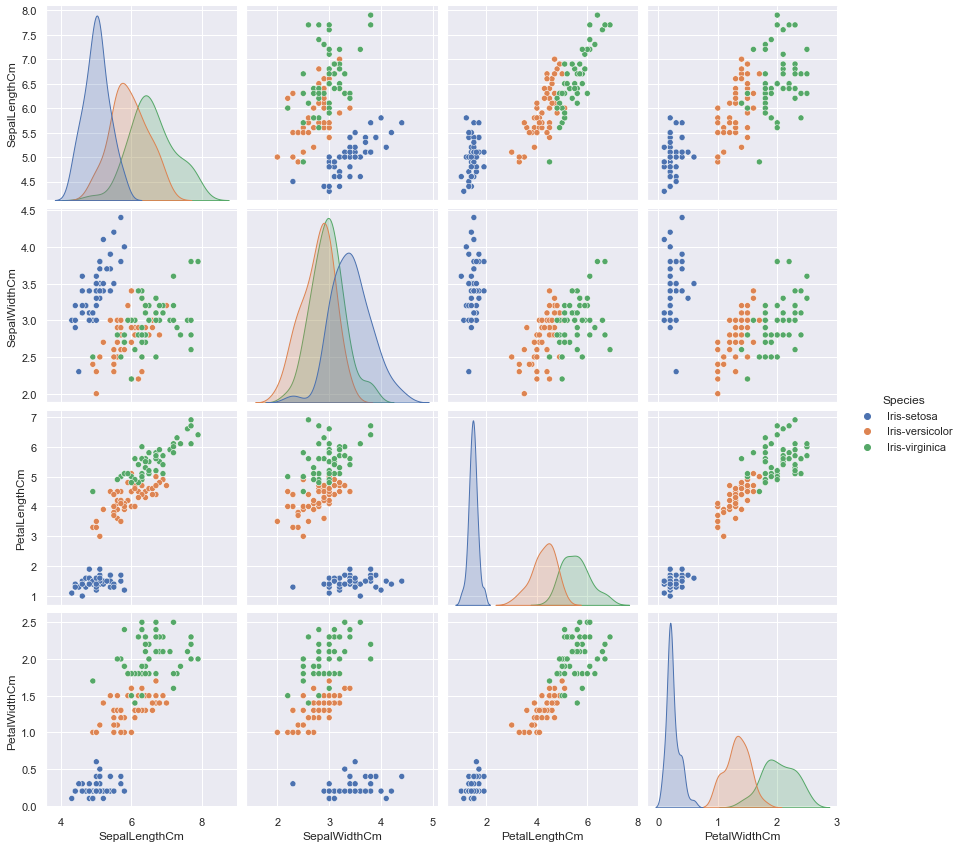

In [7]:
sns.pairplot(data.drop("Id", axis=1), hue="Species", size=3)
sns.set(rc={'figure.figsize':(12,16)})
plt.show()

## Plot Histrogram ##

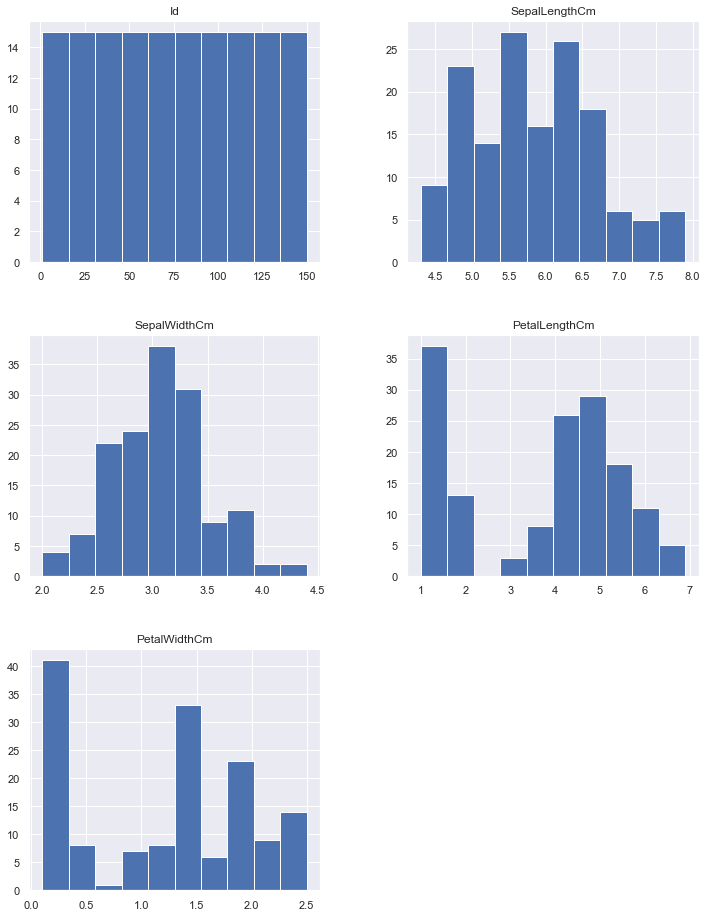

In [8]:
data.hist(layout=(3,2),figsize=(12,16))
plt.show()

## Box Plots Visualization ##

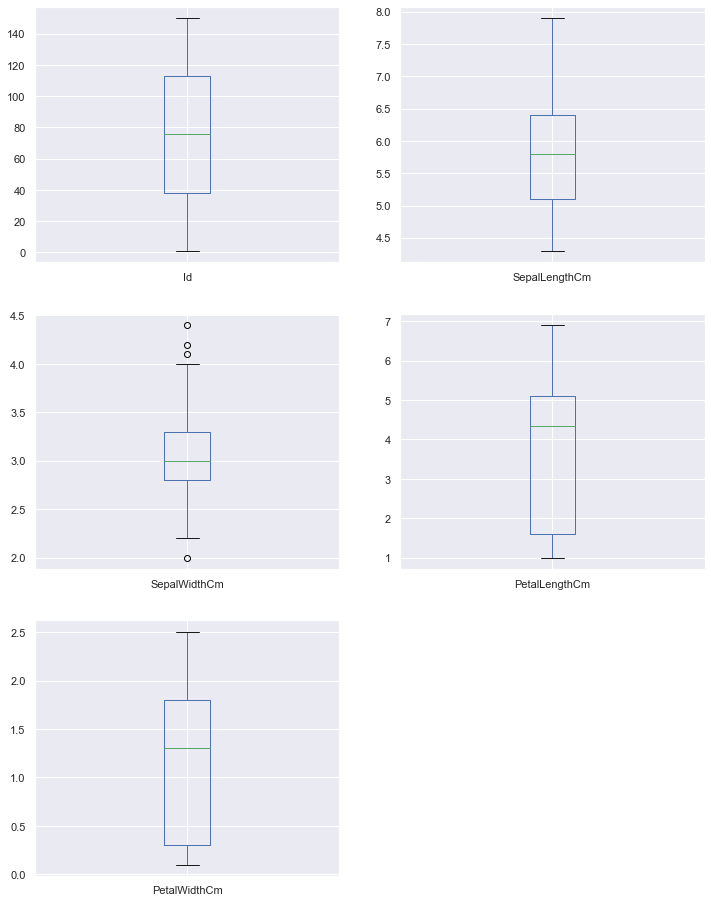

In [9]:
data.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False)
plt.show()

## Build A model with Logistic Regression ##


In [10]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)




/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## # Making the Confusion Matrix ##

In [11]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)


Confusion Matrix
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


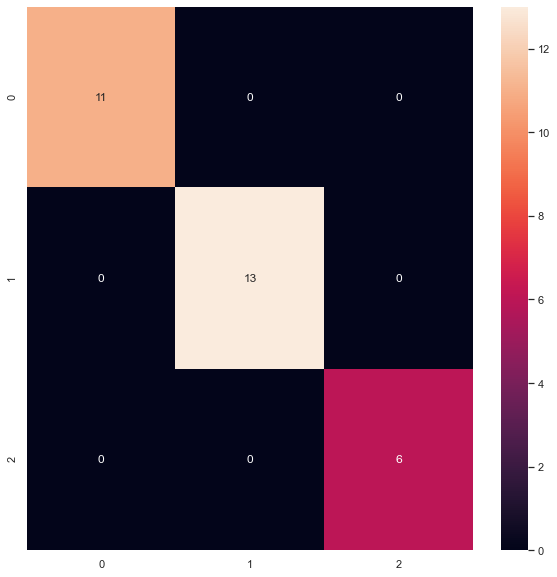

In [12]:
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)
plt.show()